###  Project 

In [2]:
# Import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Exploratory Data Analysis on Comcast dataset.

In [4]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [5]:
# Display data 

df

In [9]:
# Display total Number of Rows and Columns 

print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])


Rows    :  2224
Columns :  11


In [13]:
# Display all Column names 

df.columns

In [15]:
# Display information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.3+ KB


In [17]:
# Display Unique values in each column.

df.nunique()

Ticket #                       2224
Customer Complaint             1841
Date                             91
Date_month_year                  91
Time                           2190
Received Via                      2
City                            928
State                            43
Zip code                       1543
Status                            4
Filing on Behalf of Someone       2
dtype: int64

In [20]:
# Display Unique values of 'Received Via'.

df['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [23]:
set(df['Received Via'].values)

{'Customer Care Call', 'Internet'}

In [24]:
# Display Unique values in :  cities, states, status, Filing on Behalf of Someone

In [29]:
# City
print(set(df['City']))

In [30]:
df['City'].nunique()

928

In [32]:
df['City'].unique()

In [33]:
# State

In [35]:
df['State'].unique()

In [36]:
#  Status

In [38]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [39]:
# Filing on Behalf of Someone

In [40]:
df['Filing on Behalf of Someone'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
# Status 

In [44]:
df['Status'].value_counts()

Status
Solved     973
Closed     734
Open       363
Pending    154
Name: count, dtype: int64

In [45]:
# Replace all 'Closed' with 'Solved'  and  'Pending' with 'Open'.

In [46]:
# List comprehension 

# list_name = [Value             condition      for Loop]

In [47]:
df['Status'] = [ 'Solved'           if i ==  'Closed' or i == 'Solved' else  'Open'            for i in df['Status']]

In [48]:
df['Status'].unique()

array(['Solved', 'Open'], dtype=object)

In [49]:
df['Status'].value_counts()

Status
Solved    1707
Open       517
Name: count, dtype: int64

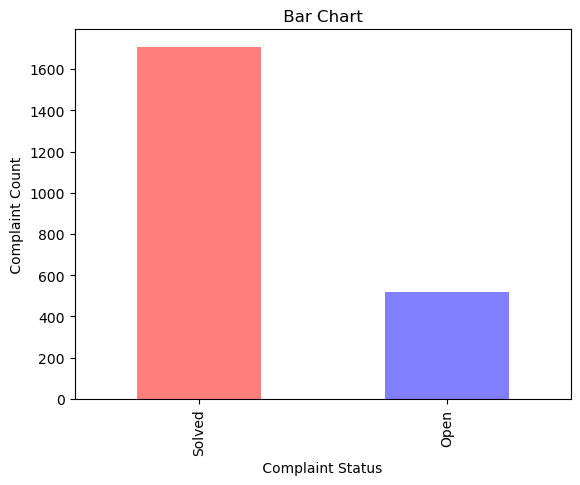

In [58]:
# Plot Complaint Status.

df['Status'].value_counts().plot.bar(color = ['red', 'blue'], alpha = 0.5)
plt.xlabel(' Complaint Status ')
plt.ylabel(' Complaint Count ')
plt.title(' Bar Chart ')
plt.show()

In [59]:
# Plot Daily Complaint Charts

In [5]:
import warnings
warnings.filterwarnings('ignore')

df['Date'] = pd.to_datetime(df['Date'])   # Converting Date column into datatype 'Date'

In [69]:
df['Date'].value_counts().sort_index()[:5]

Date
2015-04-01    18
2015-04-02    27
2015-04-03    15
2015-04-04    12
2015-04-05     6
Name: count, dtype: int64

<Axes: xlabel='Date'>

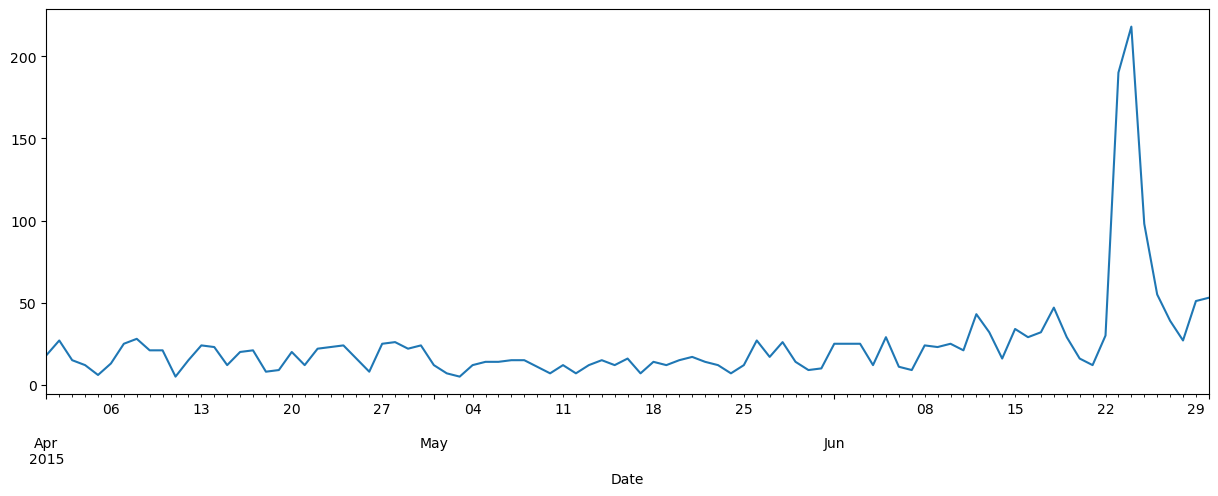

In [72]:
plt.figure(figsize=[15, 5])
df['Date'].value_counts().sort_index().plot()

In [79]:
# Display Top 10 cities with maximum complaints.

df['City'].value_counts()[: 10]

<Axes: xlabel='City'>

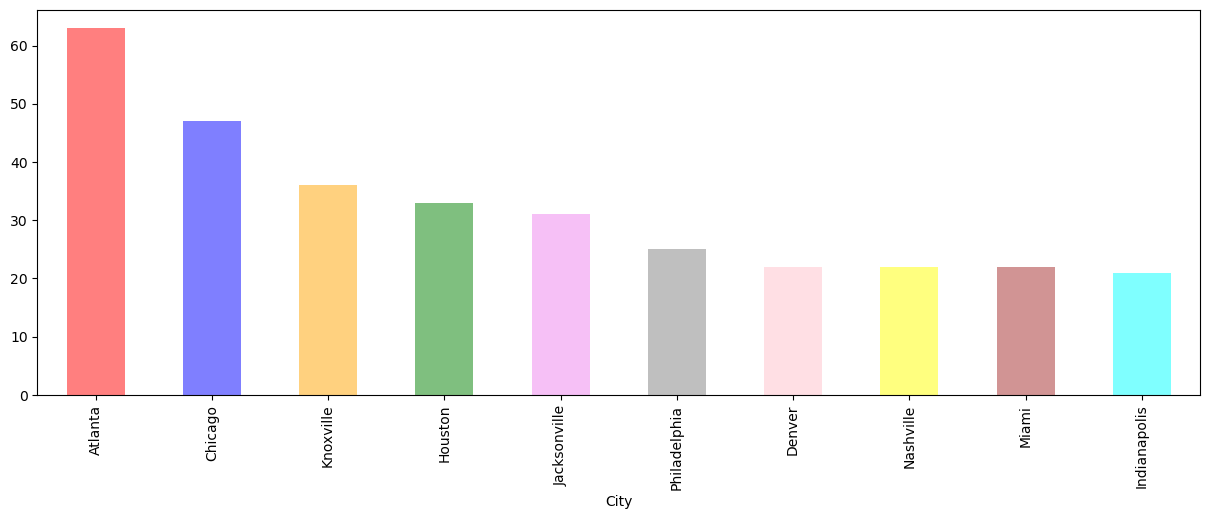

In [6]:
plt.figure(figsize=[15,5])
df['City'].value_counts()[: 10].plot.bar(color=['red','blue','orange','green','violet', 'gray','pink','yellow','brown','cyan'], alpha = 0.5)

In [80]:
# Display Top 5 States with Max Compalaints. also give % Complaints. 

In [91]:
df['State'].value_counts()[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
Name: count, dtype: int64

<Axes: xlabel='State'>

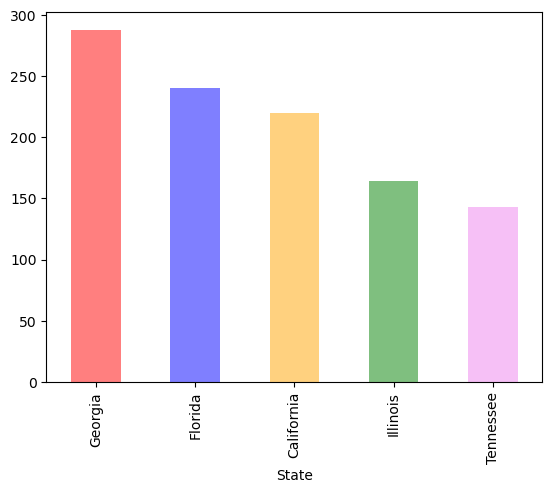

In [7]:
df['State'].value_counts()[:5].plot.bar(color=['red','blue','orange','green','violet'], alpha = 0.5)

In [89]:
#  % Complaints

round(df['State'].value_counts()[:5]  / df.shape[0]  * 100 , 2)

State
Georgia       12.95
Florida       10.79
California     9.89
Illinois       7.37
Tennessee      6.43
Name: count, dtype: float64

In [92]:
# Identify complaints received through each mode.  

In [94]:
df['Received Via'].value_counts()

Received Via
Customer Care Call    1119
Internet              1105
Name: count, dtype: int64

In [98]:
df['Received Via'].value_counts() / df.shape[0] * 100 

Received Via
Customer Care Call    50.314748
Internet              49.685252
Name: count, dtype: float64

In [99]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [100]:
# 

df['Filing on Behalf of Someone'].value_counts()

Filing on Behalf of Someone
No     2021
Yes     203
Name: count, dtype: int64

In [101]:
# Bivariate Analysis 

In [102]:
# Display State wise Status of Complaints. 

In [107]:
df.groupby('State')['Status'].value_counts().unstack()

<Figure size 2000x1000 with 0 Axes>

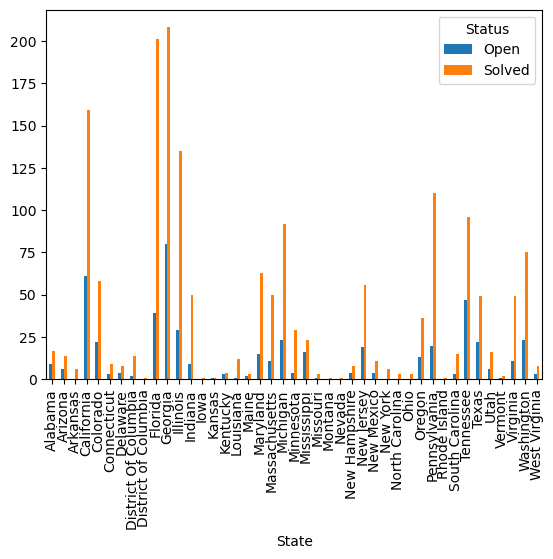

In [113]:
plt.figure(figsize = [20, 10])
df.groupby('State')['Status'].value_counts().unstack().plot.bar()
plt.show()

In [119]:
# . State wise Compalaint channels.

df.groupby('State')['Received Via'].value_counts().unstack()

In [120]:
# . Display channel wise complaint status.

df.groupby('Received Via')['Status'].value_counts().unstack()

Status,Open,Solved
Received Via,,
Customer Care Call,255,864
Internet,262,843
